In [176]:
import pandas as pd

In [177]:
data = pd.read_csv('../Datasets/Mall Customers.csv')

In [178]:
data.Gender = [1 if i=="Male" else 0 for i in data.Gender]

In [179]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [180]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# EM Algorithm

In [181]:
from sklearn.mixture import GaussianMixture

In [182]:
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)

In [183]:
gmm.fit(X)

GaussianMixture(n_components=5, random_state=42)

In [184]:
labels_gmm = gmm.predict(X)

In [185]:
labels_gmm

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int64)

# K Means

In [186]:
from sklearn.cluster import KMeans

In [187]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

In [188]:
kmeans.fit(X)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [189]:
labels_kmeans = kmeans.labels_

In [190]:
labels_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

# Comparision

In [191]:
from sklearn.metrics import silhouette_score

In [192]:
silhouette_avg_gmm = silhouette_score(X, labels_gmm)
print(silhouette_avg_gmm)

0.5528243704895652


In [193]:
silhouette_avg_kmeans = silhouette_score(X, labels_kmeans)
print(silhouette_avg_kmeans)

0.553931997444648


# Plots

In [194]:
import matplotlib.pyplot as plt

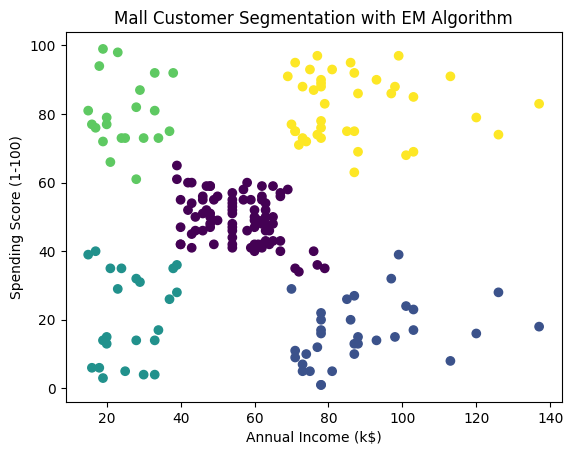

In [195]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_gmm)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation with EM Algorithm')
plt.show()

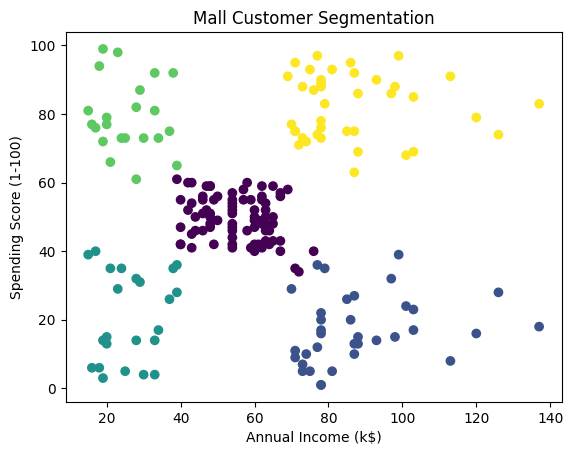

In [196]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels_kmeans)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Mall Customer Segmentation')
plt.show()